## ISMT S-136 Time Series Analysis with Python, Summer 2021   
### Section 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

## 1. ACF and PACF of an AR(1) Process

### Theoretical ACF and PACF of AR(1) with $\phi = 0.9$

In [2]:
# AR(1) with phi = 0.9

phi = np.array([0.9])
theta = np.array([0.])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)


coefficients of the autoregressive operator: [ 1.  -0.9]
coefficients of the moving average operator: [1. 0.]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


Theoretical ACF of AR(1) with phi = 0.9:
 [1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517 0.12157665 0.10941899 0.09847709 0.08862938
 0.07976644 0.0717898  0.06461082 0.05814974 0.05233476 0.04710129]


Theoretical ACF of AR(1) with phi = 0.9:
 [ 1.00000000e+00  9.00000000e-01  7.01193489e-17 -5.08365280e-16
  1.07516335e-15 -1.08263106e-15  1.51925256e-16  2.92163954e-16
 -3.03850512e-16  3.94421338e-16 -1.49003616e-16 -2.24966244e-16
  1.31473779e-16  1.46081977e-16 -1.60690175e-16  9.93357443e-17
 -8.03450873e-17 -1.60690175e-17  9.93357443e-17 -9.49532850e-17
  5.55111512e-17 -4.38245931e-18 -1.97210669e-17  2.19122965e-17
  2.41035262e-17 -3.94421338e-17 -5.11286919e-17  1.04448614e-16
 -5.62415611e-17 -2.95816003e-17]


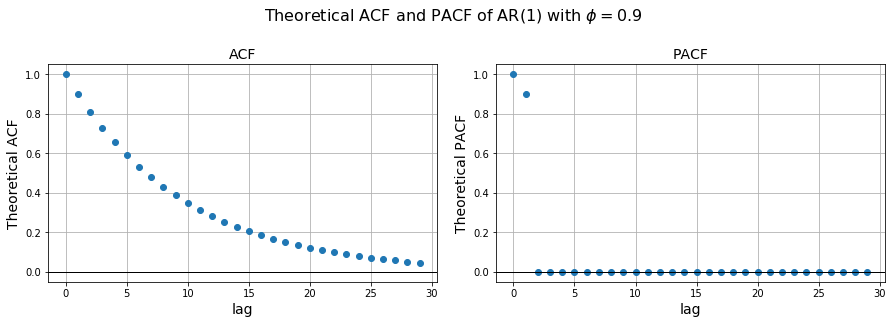

In [3]:
h_max = 30
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

print("Theoretical ACF of AR(1) with phi = " + str(phi[0]) + ":\n",rho)
print("\n")
print("Theoretical ACF of AR(1) with phi = " + str(phi[0]) + ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of AR(1) with $\phi=$' + str(phi[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

ax[0].plot(rho,linestyle='None',marker='o')
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-0.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-0.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)


### Sample ACF and PACF of AR(1) with $\phi = 0.9$

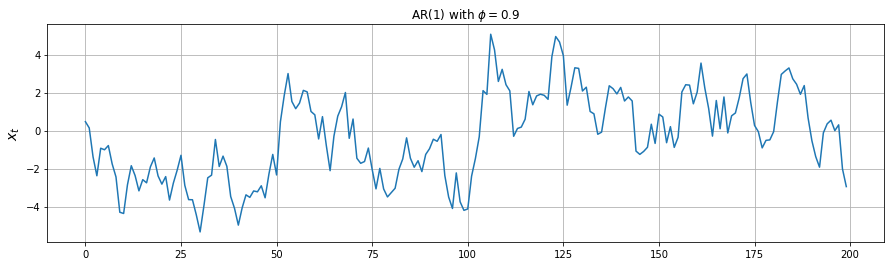

In [4]:
np.random.seed(123456)
n=200
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

plt.figure(figsize=(15,4))
plt.plot(xt)
plt.ylabel("$x_t$",fontsize=14)
plt.title("AR(1) with $\phi = $" + str(phi[0]))
plt.grid(True)

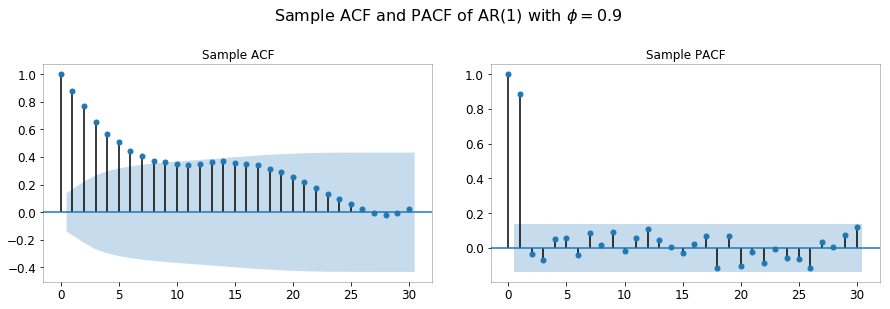

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of AR(1) with $\phi=$' + str(phi[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")   

plt.show()

## 2. ACF and PACF of an AR(2) Process

### Theoretical ACF and PACF of AR(2) with $\phi_1 = 1.5$, $\phi_2=-0.7$

In [6]:
# AR(2) with phi1=1.5, phi2=-0.7

phi = np.array([1.5, -0.7])
theta = np.array([0.])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [ 1.  -1.5  0.7]
coefficients of the moving average operator: [1. 0.]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


Theoretical ACF of AR(2) with phi1 = 1.5, phi2 = -0.7:
 [ 1.00000000e+00  8.82352941e-01  6.23529412e-01  3.17647059e-01
  4.00000000e-02 -1.62352941e-01 -2.71529412e-01 -2.93647059e-01
 -2.50400000e-01 -1.70047059e-01 -7.97905882e-02 -6.52941176e-04
  5.48740000e-02  8.27680588e-02  8.57402882e-02  7.06727912e-02
  4.59909850e-02  1.95155237e-02 -2.92040399e-03 -1.80414726e-02
 -2.50179260e-02 -2.48978583e-02 -1.98342392e-02 -1.23228580e-02
 -4.60031954e-03  1.72552127e-03  5.80850559e-03  7.50489349e-03
  7.19138632e-03  5.53365404e-03]


Theoretical ACF of AR(2) with phi1 = 1.5, phi2 = -0.7:
 [ 1.00000000e+00  8.82352941e-01 -7.00000000e-01 -3.61162625e-15
  5.90210751e-16  5.86317940e-16 -4.81102767e-16  3.68628739e-16
  4.54419318e-16 -5.90567049e-17 -1.39558078e-16 -2.85685147e-17
  7.03804526e-17 -4.25287869e-17  1.15333175e-16 -1.70277140e-16
  8.24164785e-17 -7.35764042e-17  1.69876198e-16 -1.80730124e-16
  9.40171229e-17 -1.00745660e-16  1.21777429e-16 -9.37867830e-17
  4.906

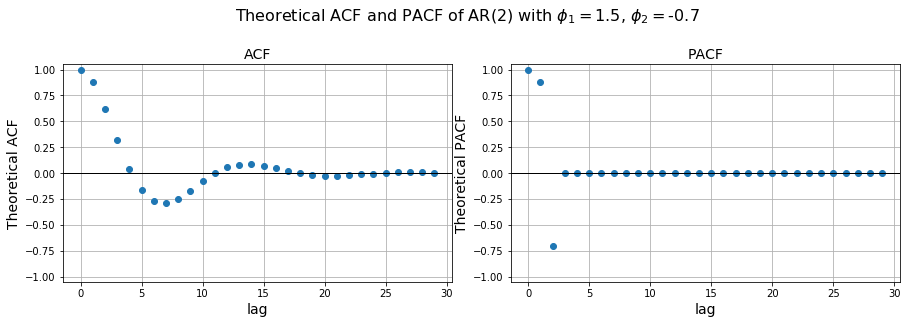

In [7]:
h_max = 30
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

print("Theoretical ACF of AR(2) with phi1 = " + str(phi[0]) + ", phi2 = " + str(phi[1]) + ":\n",rho)
print("\n")
print("Theoretical ACF of AR(2) with phi1 = " + str(phi[0]) + ", phi2 = " + str(phi[1]) + ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of AR(2) with $\phi_1=$'+str(phi[0])+", $\phi_2=$"+str(phi[1]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

ax[0].plot(rho,linestyle='None',marker='o')
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-1.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

### Sample ACF and PACF of AR(2) with $\phi_1 = 1.5$, $\phi_2=-0.7$

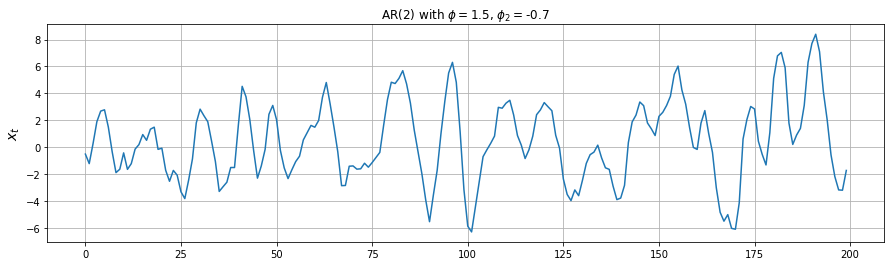

In [8]:
np.random.seed(1234567)
n=200
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

plt.figure(figsize=(15,4))
plt.plot(xt)
plt.ylabel("$x_t$",fontsize=14)
plt.title("AR(2) with $\phi=$"+str(phi[0])+", $\phi_2=$"+str(phi[1]))
plt.grid(True)

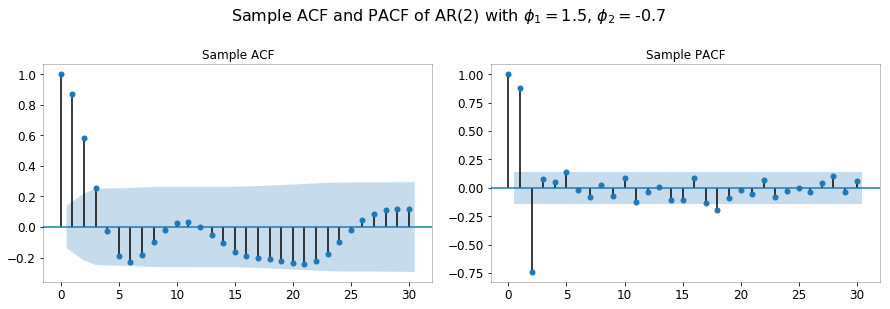

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of AR(2) with $\phi_1=$'+str(phi[0])+", $\phi_2=$"+str(phi[1]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")

plt.show()

## 3. ACF and PACF of an MA(1) Process

### Theoretical ACF and PACF of MA(1) with $\theta = 0.9$

In [10]:
# MA(1) with theta = 0.9

phi = np.array([0])
theta = np.array([0.9])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [1 0]
coefficients of the moving average operator: [1.  0.9]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


Theoretical ACF of MA(1) with theta = 0.9:
 [1.         0.49723757 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


Theoretical ACF of MA(1) with theta = 0.9:
 [ 1.          0.49723757 -0.32845383  0.24319934 -0.19139394  0.15635134
 -0.1309253   0.11154614 -0.0962328   0.08379774 -0.07348555  0.06479226
 -0.05736822  0.05096256 -0.04539004  0.04051031 -0.03621461  0.03241695
 -0.02904805  0.02605124 -0.02337948  0.02099319 -0.01885879  0.01694741
 -0.01523414  0.01369724 -0.01231771  0.01107879 -0.00996571  0.00896536]


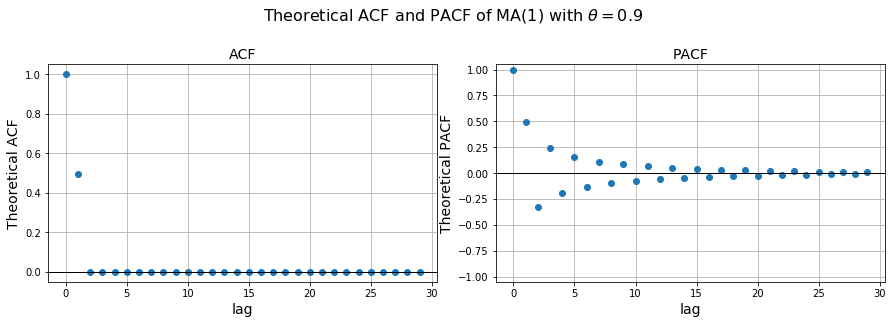

In [11]:
h_max = 30
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

print("Theoretical ACF of MA(1) with theta = " + str(theta[0]) + ":\n",rho)
print("\n")
print("Theoretical ACF of MA(1) with theta = " + str(theta[0]) + ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of MA(1) with $\\theta=$' + str(theta[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

ax[0].plot(rho,linestyle='None',marker='o')
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-0.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

### Sample ACF and PACF of MA(1) with $\theta = 0.9$

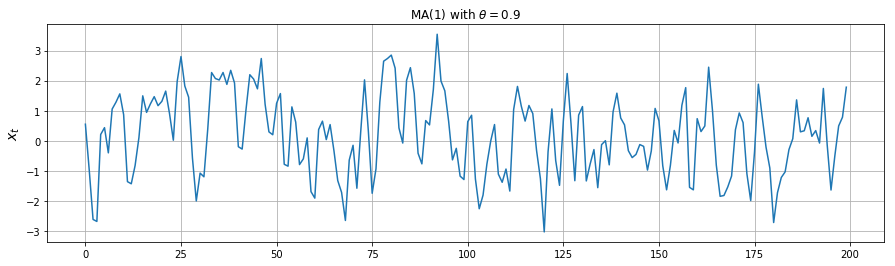

In [12]:
np.random.seed(12345678)
n=200
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

plt.figure(figsize=(15,4))
plt.plot(xt)
plt.ylabel("$x_t$",fontsize=14)
plt.title("MA(1) with $\\theta = $" + str(theta[0]))
plt.grid(True)

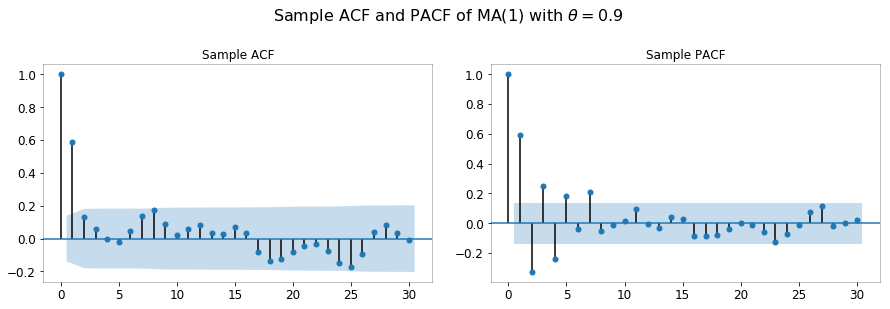

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of MA(1) with $\\theta=$' + str(theta[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")   

plt.show()

## 4. ACF and PACF of an MA(2) Process

### Theoretical ACF and PACF of MA(2) with $\theta_1 = 1$, $\theta_2=0.7$

In [14]:
# MA(2) with theta=1, theta2=0.7

phi = np.array([0])
theta = np.array([1, 0.7])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [1 0]
coefficients of the moving average operator: [1.  1.  0.7]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


Theoretical ACF of MA(2) with theta1 = 1.0, theta2 = 0.7:
 [1.         0.68273092 0.2811245  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


Theoretical ACF of MA(2) with theta1 = 1.0, theta2 = 0.7:
 [ 1.          0.68273092 -0.34651521 -0.04653987  0.24993854 -0.21411132
  0.04972784  0.0950971  -0.12721959  0.06198938  0.02617039 -0.06892271
  0.05065505 -0.00259837 -0.03274394  0.03452646 -0.01164172 -0.01250646
  0.02064224 -0.01189203 -0.0025534   0.01087489 -0.00908735  0.00147582
  0.00488481 -0.00591764  0.00249843  0.00164382 -0.00339266  0.002242  ]


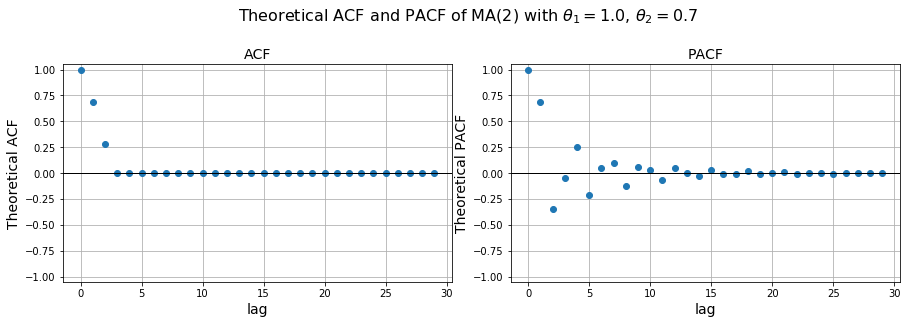

In [15]:
h_max = 30
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

print("Theoretical ACF of MA(2) with theta1 = " + str(theta[0]) + ", theta2 = " + str(theta[1]) + ":\n",rho)
print("\n")
print("Theoretical ACF of MA(2) with theta1 = " + str(theta[0]) + ", theta2 = " + str(theta[1]) + ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of MA(2) with $\\theta_1=$'+str(theta[0])+", $\\theta_2=$"+str(theta[1]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

ax[0].plot(rho,linestyle='None',marker='o')
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-1.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

### Sample ACF and PACF of MA(2) with $\phi_1 = 1$, $\phi_2=0.7$

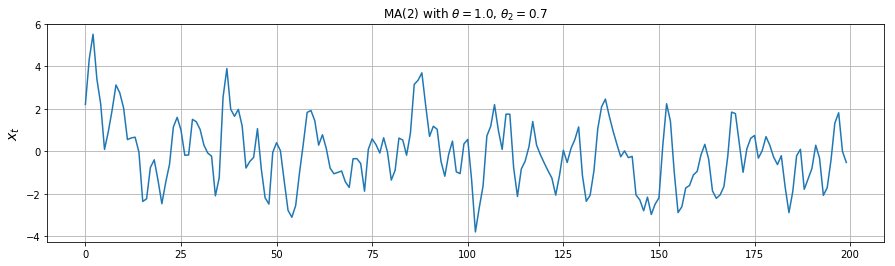

In [16]:
np.random.seed(123456789)
n=200
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

plt.figure(figsize=(15,4))
plt.plot(xt)
plt.ylabel("$x_t$",fontsize=14)
plt.title("MA(2) with $\\theta=$"+str(theta[0])+", $\\theta_2=$"+str(theta[1]))
plt.grid(True)

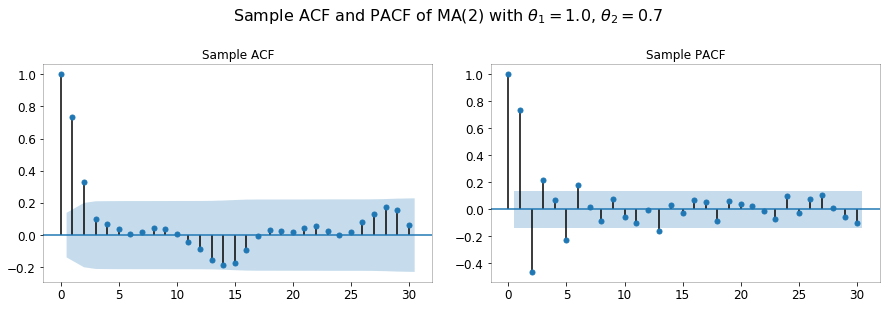

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of MA(2) with $\\theta_1=$'+str(theta[0])+", $\\theta_2=$"+str(theta[1]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")

plt.show()

## 5. ACF and PACF of an ARMA(1,1) Process

### Theoretical ACF and PACF of ARMA(2) with $\theta_1 = 1$, $\theta_2=0.7$

In [18]:
# ARMA(2) with theta=1, theta2=0.7

phi = np.array([0.9])
theta = np.array([0.7])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

print("\n")
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)

coefficients of the autoregressive operator: [ 1.  -0.9]
coefficients of the moving average operator: [1.  0.7]


Is the process causal?      Answer: True
Is the process invertible?  Answer: True


Theoretical ACF of ARMA(2) with phi1 = 0.9, theta1 = 0.7:
 [1.         0.94836364 0.85352727 0.76817455 0.69135709 0.62222138
 0.55999924 0.50399932 0.45359939 0.40823945 0.3674155  0.33067395
 0.29760656 0.2678459  0.24106131 0.21695518 0.19525966 0.1757337
 0.15816033 0.14234429 0.12810986 0.11529888 0.10376899 0.09339209
 0.08405288 0.07564759 0.06808283 0.06127455 0.0551471  0.04963239]


Theoretical ACF of MA(2) with phi1 = 0.9, theta1 = 0.7:
 [ 1.00000000e+00  9.48363636e-01 -4.55898512e-01  2.76662591e-01
 -1.81809112e-01  1.23560279e-01 -8.52753839e-02  5.92840915e-02
 -4.13601129e-02  2.89047241e-02 -2.02171037e-02  1.41464215e-02
 -9.90059214e-03  6.92976199e-03 -4.85060962e-03  3.39534998e-03
 -2.37671866e-03  1.66369403e-03 -1.16458273e-03  8.15206846e-04
 -5.70644428e-04  3.99450975e-04 -2.79615639e-04  1.95730933e-04
 -1.37011648e-04  9.59081519e-05 -6.71357057e-05  4.69949938e-05
 -3.28964956e-05  2.30275469e-05]


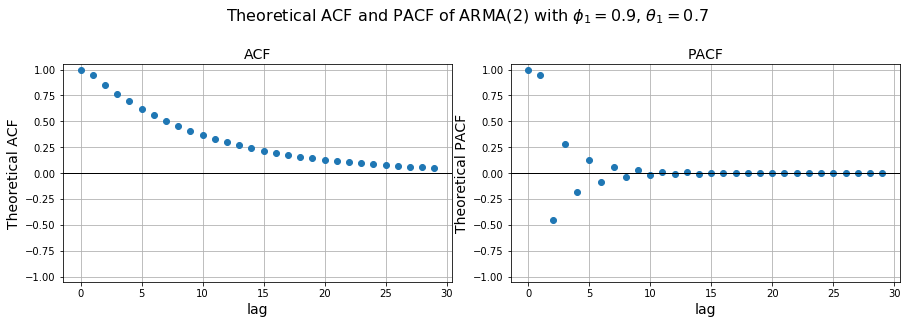

In [19]:
h_max = 30
rho = arma_process.acf(h_max)
phi_hh = arma_process.pacf(h_max)

print("Theoretical ACF of ARMA(2) with phi1 = " + str(phi[0]) + ", theta1 = " + str(theta[0]) + ":\n",rho)
print("\n")
print("Theoretical ACF of MA(2) with phi1 = " + str(phi[0]) + ", theta1 = " + str(theta[0]) + ":\n",phi_hh)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Theoretical ACF and PACF of ARMA(2) with $\phi_1=$'+str(phi[0])+", $\\theta_1=$"+str(theta[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)

ax[0].plot(rho,linestyle='None',marker='o')
ax[0].set_title("ACF",fontsize=14)
ax[0].set_xlabel("lag",fontsize=14)
ax[0].set_ylabel("Theoretical ACF",fontsize=14)
ax[0].set_ylim(-1.05, 1.05)
ax[0].axhline(linewidth=1, color='k')
ax[0].grid(True)

ax[1].plot(phi_hh,linestyle='None',marker='o')
ax[1].set_title("PACF",fontsize=14)
ax[1].set_xlabel("lag",fontsize=14)
ax[1].set_ylabel("Theoretical PACF",fontsize=14)
ax[1].set_ylim(-1.05, 1.05)
ax[1].axhline(linewidth=1, color='k')
ax[1].grid(True)

### Sample ACF and PACF of ARMA(2) with $\phi_1 = 1$, $\phi_2=0.7$

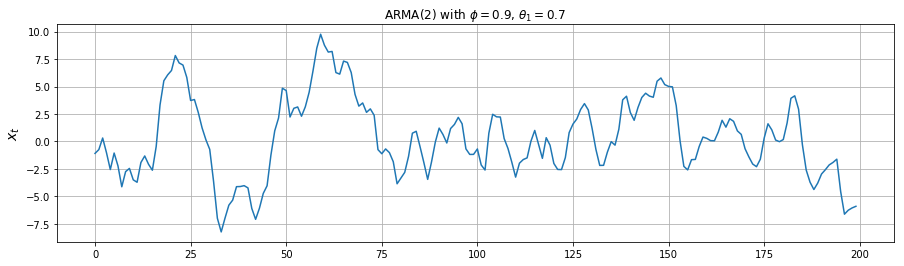

In [20]:
np.random.seed(123)
n=200
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

plt.figure(figsize=(15,4))
plt.plot(xt)
plt.ylabel("$x_t$",fontsize=14)
plt.title("ARMA(2) with $\phi=$"+str(phi[0])+", $\\theta_1=$"+str(theta[0]))
plt.grid(True)

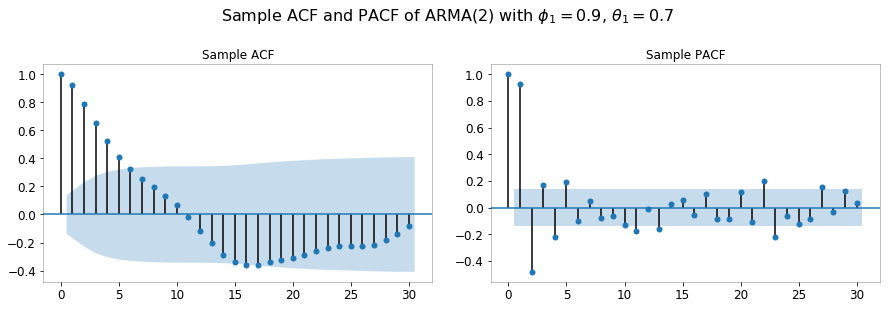

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of ARMA(2) with $\phi_1=$'+str(phi[0])+", $\\theta_1=$"+str(theta[0]),y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")

plt.show()

## 6. Behavior of the ACF and PACF for ARMA Models

In [22]:
phi =   [np.array([0.9, -0.7]), np.array([0.]),       np.array([0.9, -0.7])]
theta = [np.array([0.]),        np.array([0.3,0.1,-0.3,-0.1,0.3,-0.3]), np.array([0.3,0.1,-0.3,-0.1,0.3,-0.3])]
                                                    
ar = [np.r_[1, -phi[case]] for case in range(3)]
ma = [np.r_[1, theta[case]] for case in range(3)] 

arma_process = [smt.ArmaProcess(ar[case], ma[case]) for case in range(3)]

model = [None] * 3
for case in range(3):
    p = len(phi[case])
    q = len(theta[case])
    if (p==1 and phi[case][0]==0): p=0
    if (q==1 and theta[case][0]==0): q=0
    model[case] = "ARMA(" + str(p) + "," + str(q) + ")"
    
for case in range(3):
    print("\n" + model[case])
    print("coefficients of the autoregressive operator:", ar[case])
    print("coefficients of the moving average operator:", ma[case])
    print("Is the process causal?      Answer:",arma_process[case].isstationary)
    print("Is the process invertible?  Answer:",arma_process[case].isinvertible)


ARMA(2,0)
coefficients of the autoregressive operator: [ 1.  -0.9  0.7]
coefficients of the moving average operator: [1. 0.]
Is the process causal?      Answer: True
Is the process invertible?  Answer: True

ARMA(0,6)
coefficients of the autoregressive operator: [ 1. -0.]
coefficients of the moving average operator: [ 1.   0.3  0.1 -0.3 -0.1  0.3 -0.3]
Is the process causal?      Answer: True
Is the process invertible?  Answer: True

ARMA(2,6)
coefficients of the autoregressive operator: [ 1.  -0.9  0.7]
coefficients of the moving average operator: [ 1.   0.3  0.1 -0.3 -0.1  0.3 -0.3]
Is the process causal?      Answer: True
Is the process invertible?  Answer: True


In [23]:
h_max = 20

rho = [arma_process[case].acf(h_max+1) for case in range(3)]
phi_hh = [arma_process[case].pacf(h_max+1) for case in range(3)]

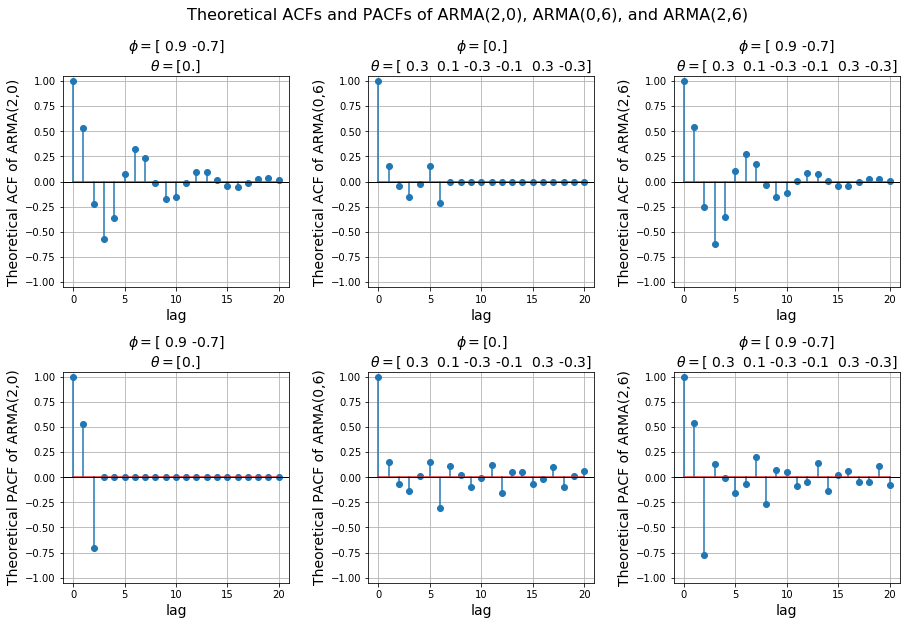

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(15,8))
fig.suptitle("Theoretical ACFs and PACFs of " + model[0] + ", " + model[1] + ", and " + model[2],y=1,size=16)
plt.subplots_adjust(wspace = 0.35,hspace = 0.4,bottom = 0)

for case in range(3):
    #ax[0][case].plot(rho[case],linestyle='None',marker='o')
    ax[0][case].stem(rho[case])
    ax[0][case].set_title("$\phi=$" + str(phi[case]) + "\n$\\theta=$" + str(theta[case]) ,fontsize=14)
    ax[0][case].set_xlabel("lag",fontsize=14)
    ax[0][case].set_ylabel("Theoretical ACF of " + model[case],fontsize=14)
    ax[0][case].set_ylim(-1.05, 1.05)
    ax[0][case].axhline(linewidth=1, color='k')
    ax[0][case].grid(True)
    
    #ax[0][case].plot(rho[case],linestyle='None',marker='o')
    ax[1][case].stem(phi_hh[case])
    ax[1][case].set_title("$\phi=$" + str(phi[case]) + "\n$\\theta=$" + str(theta[case]) ,fontsize=14)
    ax[1][case].set_xlabel("lag",fontsize=14)
    ax[1][case].set_ylabel("Theoretical PACF of " + model[case],fontsize=14)
    ax[1][case].set_ylim(-1.05, 1.05)
    ax[1][case].axhline(linewidth=1, color='k')
    ax[1][case].grid(True)